In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog, graycomatrix, graycoprops, local_binary_pattern
from scipy.ndimage import generic_filter
from skimage.color import rgb2gray

In [2]:
!pip install scikit-image

In [5]:
from skimage.feature import hog
from skimage import color
img = cv2.imread(r"C:\Users\anasj\Desktop\dlia-practice\sample.png")
if img is None:
    raise FileNotFoundError("Image not found at the specified path. Please check the file location and name.")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# HOG feature extraction
features, hog_image = hog(gray,
                          orientations=9,
                          pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2),
                          visualize=True,
                          block_norm='L2-Hys')

# Show HOG image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('HOG Features')
plt.imshow(hog_image, cmap='gray')
plt.show()

# If you want to print the feature vector length
print("HOG feature vector length:", len(features))

FileNotFoundError: Image not found at the specified path. Please check the file location and name.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.feature import graycomatrix, graycoprops
img_gray = color.rgb2gray(img)               # Convert to grayscale

# Convert to 8-bit unsigned integer
img_gray_uint8 = (img_gray * 255).astype(np.uint8)

# Compute GLCM
glcm = graycomatrix(img_gray_uint8, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

# Extract GLCM properties
contrast = graycoprops(glcm, 'contrast')[0, 0]
correlation = graycoprops(glcm, 'correlation')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

# Print GLCM features
print("GLCM Features:")
print(f"  Contrast: {contrast}")
print(f"  Correlation: {correlation}")
print(f"  Energy: {energy}")
print(f"  Homogeneity: {homogeneity}")


GLCM Features:
  Contrast: 162.11392792054758
  Correlation: 0.9775380907197379
  Energy: 0.0825143028740796
  Homogeneity: 0.5561239910362562


LBP Feature Vector (Histogram):
[0.0689 0.0764 0.0338 0.0883 0.0863 0.1299 0.0496 0.0975 0.2233 0.146 ]


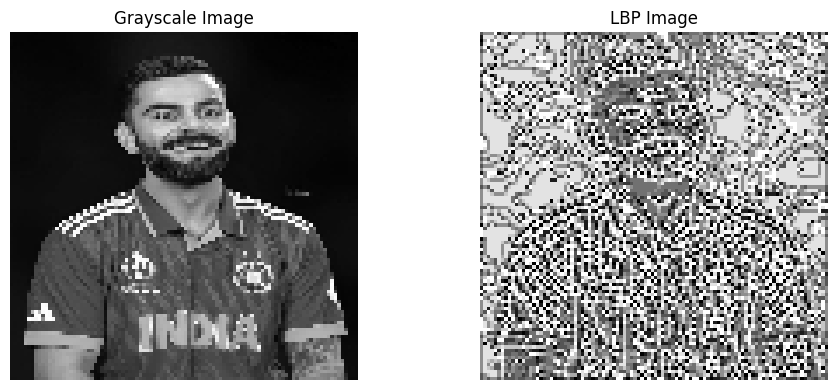

In [25]:
from skimage.feature import local_binary_pattern

# Load image
img = cv2.imread(r"C:\Users\Rishu\Downloads\vvv.jpg")
if img is None:
    raise FileNotFoundError("Image not found at the specified path.")

# Convert to grayscale and resize
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (100, 100))

# LBP parameters
radius = 1
n_points = 8 * radius

# Compute LBP
lbp = local_binary_pattern(gray, n_points, radius, method="uniform")

# Compute histogram
n_bins = int(lbp.max() + 1)
hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins), density=True)

# Print histogram
print("LBP Feature Vector (Histogram):")
print(hist)

# Plot grayscale and LBP image
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lbp, cmap='gray')
plt.title('LBP Image')
plt.axis('off')

plt.tight_layout()
plt.show()

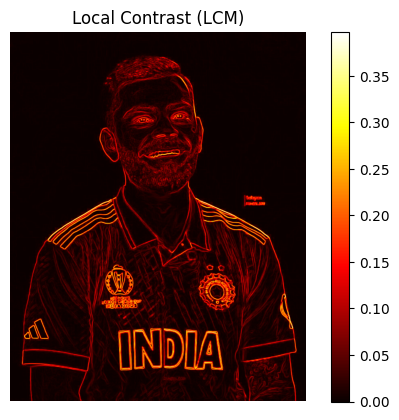

LCM Mean: 0.019220012060175765
LCM Std Dev: 0.04172370616469463


In [19]:
def local_contrast(window):
    return np.std(window)

# Apply local contrast measure using 3x3 window
lcm = generic_filter(img_gray.astype(float), local_contrast, size=3)

# Display result
plt.imshow(lcm, cmap='hot')
plt.title("Local Contrast (LCM)")
plt.axis("off")
plt.colorbar()
plt.show()

# Print mean and standard deviation of LCM
lcm_mean = np.mean(lcm)
lcm_std = np.std(lcm)

print(f"LCM Mean: {lcm_mean}")
print(f"LCM Std Dev: {lcm_std}")  # <-- Fixed typo here


C:\Users\Rishu\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


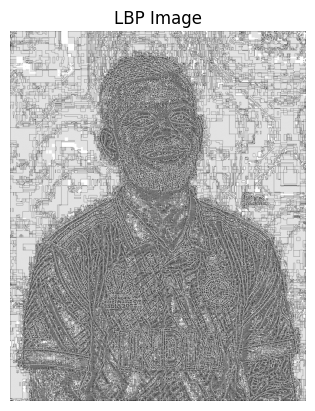

LBP feature vector length: 10


In [20]:
radius = 1
n_points = 8 * radius
lbp = local_binary_pattern(img_gray, n_points, radius, method='uniform')

plt.imshow(lbp, cmap='gray')
plt.title("LBP Image")
plt.axis("off")
plt.show()

# Histogram of LBP
lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
lbp_hist = lbp_hist.astype("float")
lbp_hist /= (lbp_hist.sum() + 1e-7)

print(f"LBP feature vector length: {len(lbp_hist)}")

In [21]:
moments = cv2.moments(img_gray)
hu_moments = cv2.HuMoments(moments).flatten()
print("Hu Moments:")
print(hu_moments)

Hu Moments:
[ 4.39884777e-01  1.42694396e-02  2.03273435e-02  3.40881364e-03
  2.83235311e-05  4.05450266e-04 -1.71837573e-06]


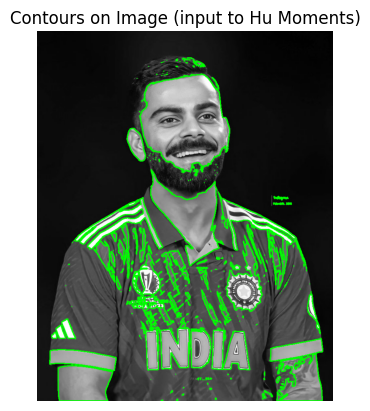

Hu Moments values:
Hu Moment 1: 0.002270031778188808
Hu Moment 2: 8.341997016576538e-07
Hu Moment 3: 5.638071969453261e-09
Hu Moment 4: 2.893611412578656e-11
Hu Moment 5: -9.578803952895434e-21
Hu Moment 6: 2.455148686616439e-14
Hu Moment 7: 6.6967667773213575e-21


In [25]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Otsu's threshold (input must be single-channel 8-bit)
_, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours
contour_img = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

# Display result
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('Contours on Image (input to Hu Moments)')
plt.axis('off')
plt.show()

# Compute Hu Moments
moments = cv2.moments(thresh)
hu_moments = cv2.HuMoments(moments).flatten()

# Print Hu Moments
print("Hu Moments values:")
for i, val in enumerate(hu_moments, 1):
    print(f"Hu Moment {i}: {val}")

Color histogram lengths: 256 256 256


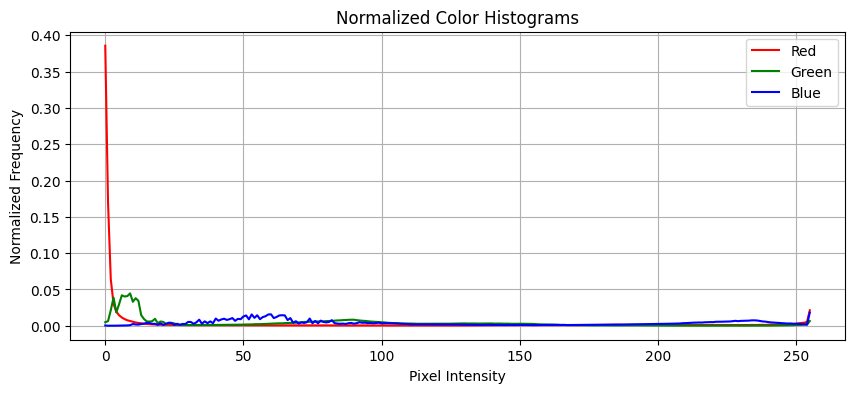

In [30]:
img_bgr = cv2.imread(r"C:\Users\Rishu\Downloads\vvv.jpg")  # Replace with actual image path

# ✅ Step 2: Check if image loaded correctly
if img_bgr is None:
    print("Error: Image not loaded. Check the file path.")
else:
    # ✅ Step 3: Convert BGR to RGB
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # ✅ Step 4: Compute histogram for each RGB channel
    hist_r = cv2.calcHist([img_rgb], [0], None, [256], [0, 256]).flatten()
    hist_g = cv2.calcHist([img_rgb], [1], None, [256], [0, 256]).flatten()
    hist_b = cv2.calcHist([img_rgb], [2], None, [256], [0, 256]).flatten()

    # ✅ Step 5: Normalize the histograms
    hist_r /= hist_r.sum()
    hist_g /= hist_g.sum()
    hist_b /= hist_b.sum()

    # ✅ Step 6: Print histogram lengths
    print("Color histogram lengths:", len(hist_r), len(hist_g), len(hist_b))

    # ✅ Optional: Plot histograms
    plt.figure(figsize=(10, 4))
    plt.plot(hist_r, color='red', label='Red')
    plt.plot(hist_g, color='green', label='Green')
    plt.plot(hist_b, color='blue', label='Blue')
    plt.title("Normalized Color Histograms")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Normalized Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()


Color histogram lengths: 256 256 256


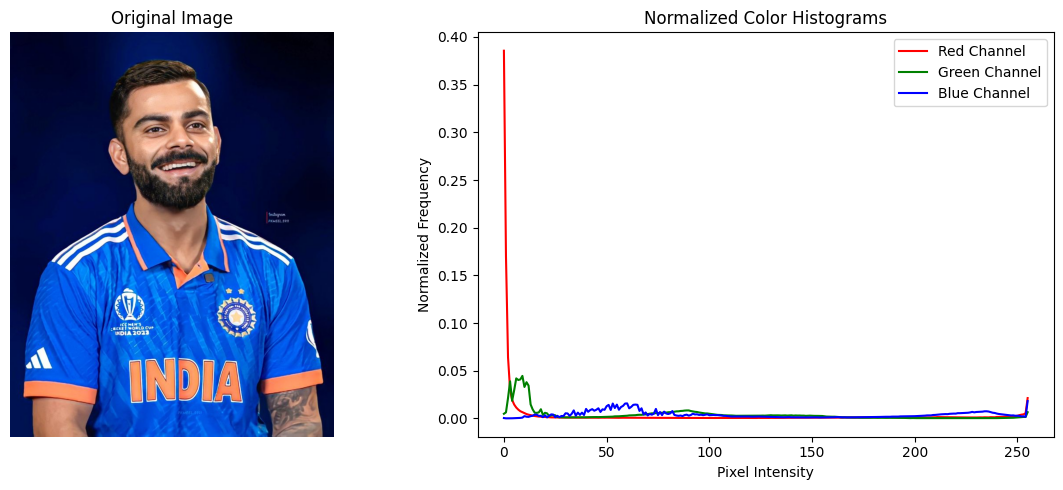

In [32]:
# Assuming image_rgb is already loaded (RGB format)
# Compute histogram for each channel
hist_r = cv2.calcHist([img_rgb], [0], None, [256], [0, 256]).flatten()
hist_g = cv2.calcHist([img_rgb], [1], None, [256], [0, 256]).flatten()
hist_b = cv2.calcHist([img_rgb], [2], None, [256], [0, 256]).flatten()

# Normalize histograms
hist_r /= hist_r.sum()
hist_g /= hist_g.sum()
hist_b /= hist_b.sum()

print("Color histogram lengths:", len(hist_r), len(hist_g), len(hist_b))

# Plot the image and histograms
plt.figure(figsize=(12, 5))

# Show original image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

# Plot histograms
plt.subplot(1, 2, 2)
plt.plot(hist_r, color='r', label='Red Channel')
plt.plot(hist_g, color='g', label='Green Channel')
plt.plot(hist_b, color='b', label='Blue Channel')
plt.title("Normalized Color Histograms")
plt.xlabel("Pixel Intensity")
plt.ylabel("Normalized Frequency")
plt.legend()

plt.tight_layout()
plt.show()

Number of keypoints: 1517
Descriptor shape: (1517, 128)


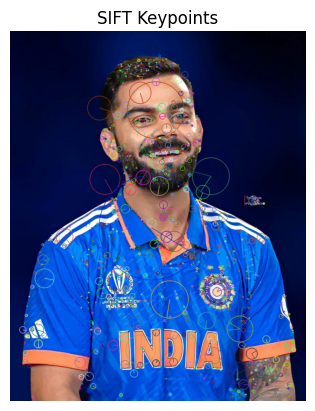

In [33]:
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img_gray, None)

print(f"Number of keypoints: {len(keypoints)}")
print(f"Descriptor shape: {descriptors.shape if descriptors is not None else 'None'}")

# Visualize keypoints
img_sift = cv2.drawKeypoints(img_rgb, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_sift)
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()

Number of ORB keypoints: 500


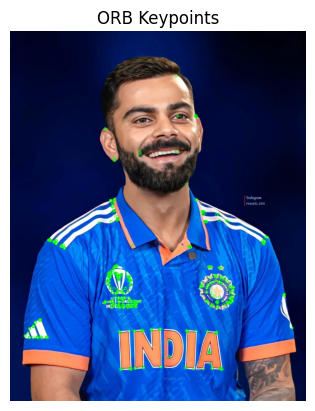

In [34]:
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(img_gray, None)

print(f"Number of ORB keypoints: {len(keypoints)}")

img_orb = cv2.drawKeypoints(img_rgb, keypoints, None, color=(0,255,0), flags=0)
plt.imshow(img_orb)
plt.title('ORB Keypoints')
plt.axis('off')
plt.show()

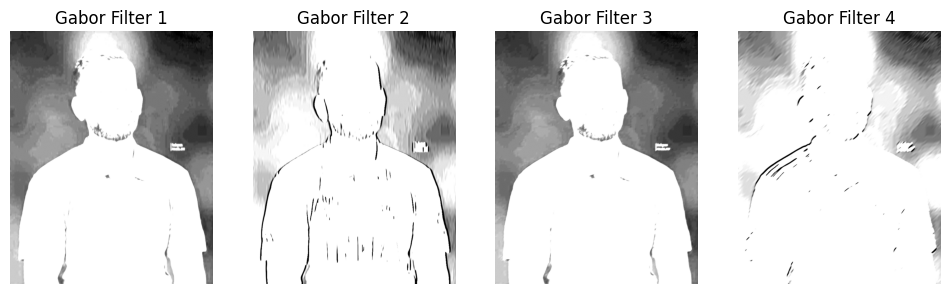

In [35]:
def build_gabor_kernels():
    kernels = []
    for theta in np.arange(0, np.pi, np.pi / 4):
        for sigma in (1, 3):
            kernel = cv2.getGaborKernel((21, 21), sigma, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
            kernels.append(kernel)
    return kernels

kernels = build_gabor_kernels()
filtered_images = [cv2.filter2D(img_gray, cv2.CV_8UC3, k) for k in kernels]

# Show filtered images for first 4 kernels
plt.figure(figsize=(12, 6))
for i, filtered in enumerate(filtered_images[:4], 1):
    plt.subplot(1, 4, i)
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Gabor Filter {i}')
    plt.axis('off')
plt.show()


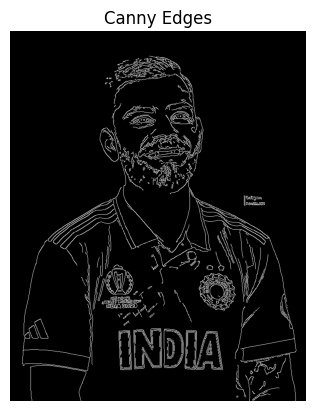

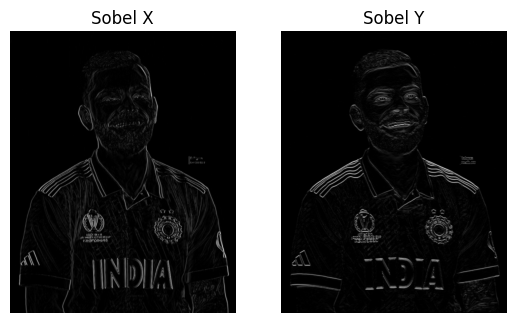

In [36]:
# Canny Edge Detection
edges = cv2.Canny(img_gray, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')
plt.show()

# Sobel Gradients
sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)

plt.subplot(1, 2, 1)
plt.imshow(np.abs(sobelx), cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(sobely), cmap='gray')
plt.title('Sobel Y')
plt.axis('off')
plt.show()